# 衡量回归算法的标准
## Mean square error
## mean absolute error 
## root mean square error

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
x = boston.data[:, 5]  # 只取RM属性，第5列

In [6]:
x.shape

(506,)

In [7]:
y = boston.target

In [8]:
y.shape

(506,)

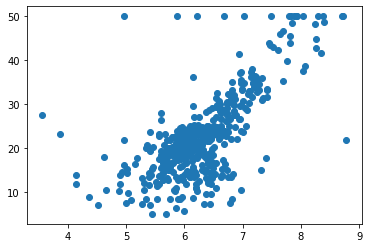

In [9]:
plt.scatter(x, y)
plt.show()

In [10]:
# 经过绘图可以发现y=50有很多奇怪的点，简单过滤一下
x = x[y < 50.0]
y = y[y < 50.0]

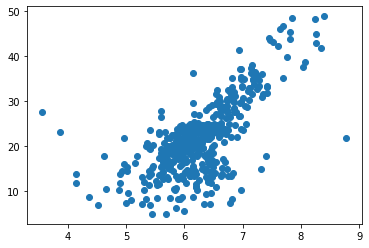

In [11]:
plt.scatter(x, y)
plt.show()

# use simplelinearregression

In [12]:
from my_ml.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_ratio=0.2, seed=666)

In [13]:
x_train.shape

(392,)

In [14]:
from my_ml.SimpleLinearRegression import SimpleLinearRegression

In [15]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

SingleLinearRegression2()

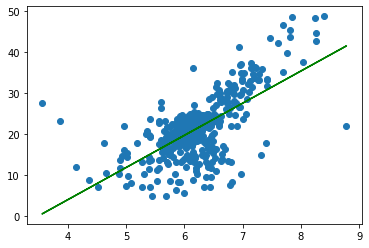

In [16]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='green')
plt.show()

In [17]:
y_predict = reg.predict(x_test)

# MSE

In [18]:
mse_test = np.sum((y_test - y_predict) ** 2) / len(y_test)
mse_test

24.156602134387438

# RMSE

In [19]:
from math import sqrt
rmse_test = sqrt(mse_test)   # 消除了量纲的影响。这个误差即4.9万元
rmse_test

4.914936635846635

# MAE

In [20]:
mae_test = np.sum(np.abs(y_test - y_predict)) / len(y_test)
mae_test

3.5430974409463873

# my_ml and scikit-learn

In [21]:
from my_ml.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [22]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

In [23]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [24]:
root_mean_squared_error(y_test, y_predict)

4.914936635846635

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict)

24.156602134387438

# R Squared

In [26]:
y_test_mean = np.mean(y_test)

In [27]:
r_squared = 1 - (np.sum((y_predict - y_test) ** 2)) / (np.sum((y_test_mean - y_test) ** 2))
r_squared

0.6129316803937324

In [28]:
r_squared2 = 1 - mean_squared_error(y_test, y_predict) / np.var(y_test)
r_squared2

0.6129316803937322

In [29]:
from sklearn.metrics import r2_score
r2_score_test = r2_score(y_test, y_predict)

In [30]:
r2_score_test

0.6129316803937324

# my_ml 的score

In [31]:
reg.score(x_test, y_test)

0.6129316803937322